In [1]:
import joblib
import math
import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer
from matplotlib.pyplot import figure
import re, numpy as np, pandas as pd
from gensim.corpora import Dictionary
import gensim.corpora as corpora
from gensim.corpora import MmCorpus

import gensim
import spacy
import pprint

from wordcloud import WordCloud
import os
import dataframe_image as dfi



# LDA Results

## Load LDA models

In [2]:
for x in range(2,7):
    y = x + 1
    model_list = "model_list_"
    coherence_values = "coherence_values_"
    perplexity_values = "perplexity_model_lda_"
    num = str(y)
    globals()[model_list + num] = joblib.load("../Models/model_list_{}.pkl".format(y,y))
    globals()[coherence_values + num] = joblib.load("../Models/coherence_values_{}.pkl".format(y,y))
    globals()[perplexity_values + num] = joblib.load("../Models/perplexity_model_lda_{}.pkl".format(y,y))

## Visualize coherence - number topics

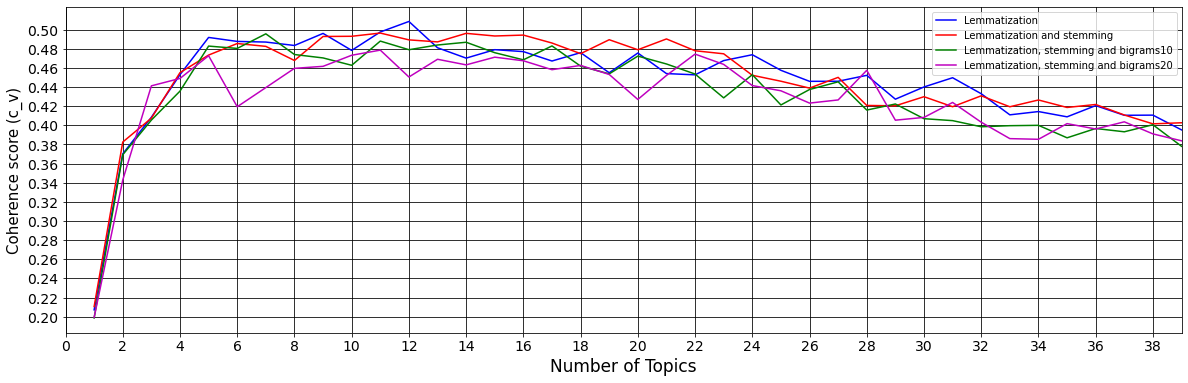

In [3]:
x = range(1,40)
plt.figure(figsize=(20,6))
plt.plot(x, coherence_values_3, 'b', label = 'Lemmatization')
plt.plot(x, coherence_values_4, 'r', label = 'Lemmatization and stemming')
plt.plot(x, coherence_values_6, 'g', label = 'Lemmatization, stemming and bigrams10')
plt.plot(x, coherence_values_5, 'm', label = 'Lemmatization, stemming and bigrams20')


plt.xlim([1, 39])
#plt.ylim([coherence_values_6[0], 0.52])

plt.xticks(np.arange(0, max(x)+1, step=2), fontsize = 14 )
plt.yticks(np.arange(0.20, coherence_values_3[11]+0.005, step=0.02), fontsize = 14)

plt.grid(True,color='black')
plt.xlabel("Number of Topics", fontsize = 17)
plt.ylabel("Coherence score (c_v)", fontsize = 15)
#leg = plt.legend(fontsize=12);
plt.legend(bbox_to_anchor=(1,1), loc="upper right", fontsize = 10)

plt.show()


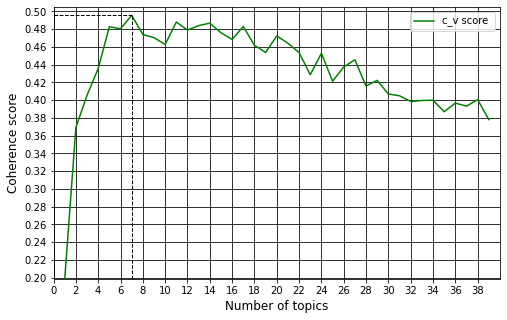

0.4956444824426689


In [4]:
x = [x for x in range(1,40)]
plt.figure(figsize=(8,5))
plt.plot(x, coherence_values_6, 'green', label= 'c_v score ')
plt.plot([7,7], [coherence_values_6[0], coherence_values_6[6]], color = 'black', linewidth= 1, linestyle='dashed')
plt.plot([0,7], [coherence_values_6[6],coherence_values_6[6]], color = 'black', linewidth= 1, linestyle='dashed')

plt.xlim([5, 40])
plt.ylim([coherence_values_6[0], 0.505])

plt.xticks(np.arange(0, max(x)+1, step=2))
plt.yticks(np.arange(0.20, coherence_values_6[6]+0.005, step=0.02))
leg = plt.legend();

plt.grid(True,color='black')
plt.xlabel('Number of topics', fontsize=12)
plt.ylabel('Coherence score', fontsize=12)
#plt.title('Coherence Scores', fontsize=20)
plt.savefig('CoherenceLDA6.png', dpi=400)
plt.show()
print(coherence_values_6[6])



## Plot results for LDA6 (lemmatize, stemming and bigrams_10) 

### Distribution topic-documents

In [2]:
df_uber = pd.read_csv("../../../Data_Extract&Analysis/uber_support_csv_with_duplicates/uber_support.csv")

In [5]:
df_uber.drop_duplicates(inplace=True, subset="tweet")

In [6]:
corpus = MmCorpus("corpus.corp")
texts = joblib.load('texts.pkl')
fulltexts = joblib.load('fulltexts.pkl')
lda_model = model_list_6[6]
dictionary = Dictionary.load("dictionary.dict")

In [7]:
df_uber['cleaned_texts_1'] = fulltexts
df_uber['length'] = df_uber['cleaned_texts_1'].str.len()

In [8]:
df_uber = df_uber[df_uber['length'] > 0] 

In [9]:
df_uber['cleaned_texts'] = texts

In [10]:
df_analyse = df_uber[['date','tweet', 'cleaned_texts_1', 'cleaned_texts', 'length']].reset_index()
df_analyse.head(6)

,index,date,tweet,cleaned_texts_1,cleaned_texts,length
0,0,2020-03-31 23:58:31,@LauraKellyKS @KansasGOP why did @Uber_Support...,"[follow, promis, disinfect, materi, driver, ca...","[follow, promis, disinfect, materi, driver, ca...",17
1,1,2020-03-31 23:52:51,@Uber_Support why did @Uber_Support and uber ...,"[uber, follow, thru, promis, disinfect, materi...","[uber, follow, thru, promis, disinfect, materi...",20
2,2,2020-03-31 23:51:11,why did @Uber_Support @Uber not follow thru wi...,"[follow, promis, disinfect, materi, driver, ca...","[follow, promis, disinfect, materi, driver, ca...",18
3,3,2020-03-31 23:50:58,Same song and dance @Uber @Uber_Support @dkhos...,"[song, danc, dead, wrong, handl, pandem, pligh...","[song, danc, dead, wrong, handl, pandem, pligh...",9
4,4,2020-03-31 23:46:27,"@Uber_Support Hey, I'm receiving ride reports ...","[receiv, ride, report, email, even, account, guy]","[receiv, ride, report, email, even, account, guy]",7
5,6,2020-03-31 23:33:37,@Uber_Support Uber gives me a ride request the...,"[uber, give, ride, request, app, right, away]","[uber, give, ride, request, app, right, away]",7


In [11]:
pprint.pprint(lda_model.print_topics(num_topics=7, num_words=20))

[(0,
  '0.056*"uber" + 0.048*"account" + 0.047*"help" + 0.036*"use" + 0.033*"get" + '
  '0.032*"tri" + 0.023*"number" + 0.023*"app" + 0.023*"email" + '
  '0.017*"contact" + 0.017*"say" + 0.017*"work" + 0.016*"phone" + 0.014*"need" '
  '+ 0.013*"eat" + 0.012*"card" + 0.011*"support" + 0.011*"phone_number" + '
  '0.011*"call" + 0.009*"code"'),
 (1,
  '0.051*"driver" + 0.049*"uber" + 0.018*"car" + 0.018*"drive" + 0.013*"peopl" '
  '+ 0.012*"know" + 0.011*"work" + 0.009*"good" + 0.008*"make" + 0.008*"get" + '
  '0.007*"well" + 0.007*"rider" + 0.007*"vehicl" + 0.006*"need" + 0.006*"want" '
  '+ 0.006*"take" + 0.006*"use" + 0.006*"right" + 0.006*"think" + '
  '0.006*"report"'),
 (2,
  '0.047*"ride" + 0.041*"uber" + 0.038*"driver" + 0.036*"trip" + 0.034*"charg" '
  '+ 0.033*"pay" + 0.026*"take" + 0.017*"show" + 0.016*"book" + 0.012*"cab" + '
  '0.011*"cash" + 0.011*"amount" + 0.010*"today" + 0.010*"ask" + 0.009*"check" '
  '+ 0.009*"money" + 0.008*"fare" + 0.008*"payment" + 0.008*"servic" + '

In [12]:
document_prob = [lda_model[doc][0] for doc in corpus]

In [13]:
max_index = []
max_probability = []
for i in document_prob:
    probability = 0
    max_value = []
    index_max_value = []
    for prob in i:
        if (prob[1]>probability):
            index_max_value = prob[0]
            max_value = prob[1]
            probability = prob[1]
    max_index.append(index_max_value)
    max_probability.append(max_value)

df = pd.DataFrame(data=max_index, columns = ['dominant_topic'])
df2 = pd.DataFrame(data=max_probability, columns = ['maximum_probability'])



In [14]:
df['maximum_probability'] = df2   
df.head(6)

,dominant_topic,maximum_probability
0,1,0.488184
1,1,0.496823
2,1,0.503537
3,6,0.420942
4,6,0.721078
5,2,0.538740


In [15]:
df['date'] = df_analyse['date']
df['tweet'] = df_analyse['tweet']
df['cleaned_texts'] = df_analyse['cleaned_texts']
df['cleaned_texts_1'] = df_analyse['cleaned_texts_1']
df['length'] = df_analyse ['length']
df.head(10)

,dominant_topic,maximum_probability,date,tweet,cleaned_texts,cleaned_texts_1,length
0,1,0.488184,2020-03-31 23:58:31,@LauraKellyKS @KansasGOP why did @Uber_Support...,"[follow, promis, disinfect, materi, driver, ca...","[follow, promis, disinfect, materi, driver, ca...",17
1,1,0.496823,2020-03-31 23:52:51,@Uber_Support why did @Uber_Support and uber ...,"[uber, follow, thru, promis, disinfect, materi...","[uber, follow, thru, promis, disinfect, materi...",20
2,1,0.503537,2020-03-31 23:51:11,why did @Uber_Support @Uber not follow thru wi...,"[follow, promis, disinfect, materi, driver, ca...","[follow, promis, disinfect, materi, driver, ca...",18
3,6,0.420942,2020-03-31 23:50:58,Same song and dance @Uber @Uber_Support @dkhos...,"[song, danc, dead, wrong, handl, pandem, pligh...","[song, danc, dead, wrong, handl, pandem, pligh...",9
4,6,0.721078,2020-03-31 23:46:27,"@Uber_Support Hey, I'm receiving ride reports ...","[receiv, ride, report, email, even, account, guy]","[receiv, ride, report, email, even, account, guy]",7
5,2,0.538740,2020-03-31 23:33:37,@Uber_Support Uber gives me a ride request the...,"[uber, give, ride, request, app, right, away]","[uber, give, ride, request, app, right, away]",7
6,4,0.577726,2020-03-31 23:28:49,@Uber_Support No way. I’m not worried about my...,"[way, worri, privaci, say, continu, work, supp...","[way, worri, privaci, say, continu, work, supp...",12
7,0,0.313814,2020-03-31 23:28:13,@Uber_Support I'm trying to file for my Califo...,"[tri, file, california, state, unemploy, insur...","[tri, file, california, state, unemploy, insur...",24
8,6,0.512970,2020-03-31 23:27:48,@Uber_Support Please @Uber_Support answer me i...,"[answer, messag, box]","[answer, messag, box]",3
9,4,0.348707,2020-03-31 23:21:43,@Uber_Support Why is there no contact info? Ho...,"[contact, info, avoid, charg, driver, say, bus...","[contact, info, avoid, charg, driver, say, bus...",8


In [16]:
df['Cluster'] = df['dominant_topic'].map( {0: "Uber account/Uber App", 1: "Uber drivers",
                                           2: "Money and payments", 3: 'Uber Eats', 4: "Opinions about Customer Service" ,
                                           5: 'Time and cancellation', 6: 'Direct contact with Uber Support' } ).astype(str)

df.head(10)

,dominant_topic,maximum_probability,date,tweet,cleaned_texts,cleaned_texts_1,length,Cluster
0,1,0.488184,2020-03-31 23:58:31,@LauraKellyKS @KansasGOP why did @Uber_Support...,"[follow, promis, disinfect, materi, driver, ca...","[follow, promis, disinfect, materi, driver, ca...",17,Uber drivers
1,1,0.496823,2020-03-31 23:52:51,@Uber_Support why did @Uber_Support and uber ...,"[uber, follow, thru, promis, disinfect, materi...","[uber, follow, thru, promis, disinfect, materi...",20,Uber drivers
2,1,0.503537,2020-03-31 23:51:11,why did @Uber_Support @Uber not follow thru wi...,"[follow, promis, disinfect, materi, driver, ca...","[follow, promis, disinfect, materi, driver, ca...",18,Uber drivers
3,6,0.420942,2020-03-31 23:50:58,Same song and dance @Uber @Uber_Support @dkhos...,"[song, danc, dead, wrong, handl, pandem, pligh...","[song, danc, dead, wrong, handl, pandem, pligh...",9,Direct contact with Uber Support
4,6,0.721078,2020-03-31 23:46:27,"@Uber_Support Hey, I'm receiving ride reports ...","[receiv, ride, report, email, even, account, guy]","[receiv, ride, report, email, even, account, guy]",7,Direct contact with Uber Support
5,2,0.538740,2020-03-31 23:33:37,@Uber_Support Uber gives me a ride request the...,"[uber, give, ride, request, app, right, away]","[uber, give, ride, request, app, right, away]",7,Money and payments
6,4,0.577726,2020-03-31 23:28:49,@Uber_Support No way. I’m not worried about my...,"[way, worri, privaci, say, continu, work, supp...","[way, worri, privaci, say, continu, work, supp...",12,Opinions about Customer Service
7,0,0.313814,2020-03-31 23:28:13,@Uber_Support I'm trying to file for my Califo...,"[tri, file, california, state, unemploy, insur...","[tri, file, california, state, unemploy, insur...",24,Uber account/Uber App
8,6,0.512970,2020-03-31 23:27:48,@Uber_Support Please @Uber_Support answer me i...,"[answer, messag, box]","[answer, messag, box]",3,Direct contact with Uber Support
9,4,0.348707,2020-03-31 23:21:43,@Uber_Support Why is there no contact info? Ho...,"[contact, info, avoid, charg, driver, say, bus...","[contact, info, avoid, charg, driver, say, bus...",8,Opinions about Customer Service


In [17]:
path = "./csv/LDA6"
try:
    if not os.path.isdir(path):
        os.makedirs(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory ./csv/LDA6 


In [18]:
df.to_csv('./csv/LDA6/uber_support_analysis.csv')

In [19]:
df_counter = df.groupby(df['dominant_topic']).size().reset_index(name='Number of tweets')
df_counter['topic_name'] = df_counter['dominant_topic'].map( {0: "Uber account/ Uber App", 1: "Uber drivers",
                                           2: "Money and payments", 3: 'Uber Eats', 4: "Opinions about Customer Service" ,
                                           5: 'Time and cancellation', 6: 'Direct contact with Uber Support' } ).astype(str)

df_counter

,dominant_topic,Number of tweets,topic_name
0,0,33277,Uber account/ Uber App
1,1,25681,Uber drivers
2,2,21088,Money and payments
3,3,26294,Uber Eats
4,4,37506,Opinions about Customer Service
5,5,20330,Time and cancellation
6,6,48224,Direct contact with Uber Support


### Topic precision

In [21]:
values_topic_0 = (df.loc[df['dominant_topic'] == 0, 'maximum_probability'].sum())/(df_counter['Number of tweets'][0])
values_topic_1 = (df.loc[df['dominant_topic'] == 1, 'maximum_probability'].sum())/(df_counter['Number of tweets'][1])
values_topic_2 = (df.loc[df['dominant_topic'] == 2, 'maximum_probability'].sum())/(df_counter['Number of tweets'][2])
values_topic_3 = (df.loc[df['dominant_topic'] == 3, 'maximum_probability'].sum())/(df_counter['Number of tweets'][3])
values_topic_4 = (df.loc[df['dominant_topic'] == 4, 'maximum_probability'].sum())/(df_counter['Number of tweets'][4])
values_topic_5 = (df.loc[df['dominant_topic'] == 5, 'maximum_probability'].sum())/(df_counter['Number of tweets'][5])
values_topic_6 = (df.loc[df['dominant_topic'] == 6, 'maximum_probability'].sum())/(df_counter['Number of tweets'][6])

values_topics = []
values_topics.append(values_topic_0)
values_topics.append(values_topic_1)
values_topics.append(values_topic_2)
values_topics.append(values_topic_3)
values_topics.append(values_topic_4)
values_topics.append(values_topic_5)
values_topics.append(values_topic_6)

topics = [x for x in range(0,7)]

df_quality = pd.DataFrame(data=topics, columns = ['topic_cluster'])

df_quality['topic_name'] = df_quality['topic_cluster'].map( {0: "Problems with Uber account/ Uber App", 1: "Opinions of Uber drivers",
                                           2: "Money issues and payments", 3: 'Uber Eats issues', 4: "Opinions of Customer Service" ,
                                           5: 'Time and cancellation issues', 6: 'Direct contact with Uber Support' } ).astype(str)

df_quality ['topic_quality'] = values_topics

In [22]:
df_quality

,topic_cluster,topic_name,topic_quality
0,0,Problems with Uber account/ Uber App,0.584878
1,1,Opinions of Uber drivers,0.526378
2,2,Money issues and payments,0.540231
3,3,Uber Eats issues,0.570612
4,4,Opinions of Customer Service,0.571457
5,5,Time and cancellation issues,0.533763
6,6,Direct contact with Uber Support,0.613277


### Save dataframes

In [23]:
path = "./dataframes/LDA6"
try:
    if not os.path.isdir(path):
        os.makedirs(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory ./dataframes/LDA6 


In [24]:
dfi.export(df_counter, "./dataframes/LDA6/df_counter.png", table_conversion='matplotlib')
dfi.export(df_quality, "./dataframes/LDA6/df_quality.png", table_conversion='matplotlib')

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


### Dominant topic per document

In [25]:
####  Plot number documents per topic

In [26]:
path = "./barChart/LDA6"
try:
    if not os.path.isdir(path):
        os.makedirs(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory ./barChart/LDA6 


<Figure size 432x288 with 0 Axes>

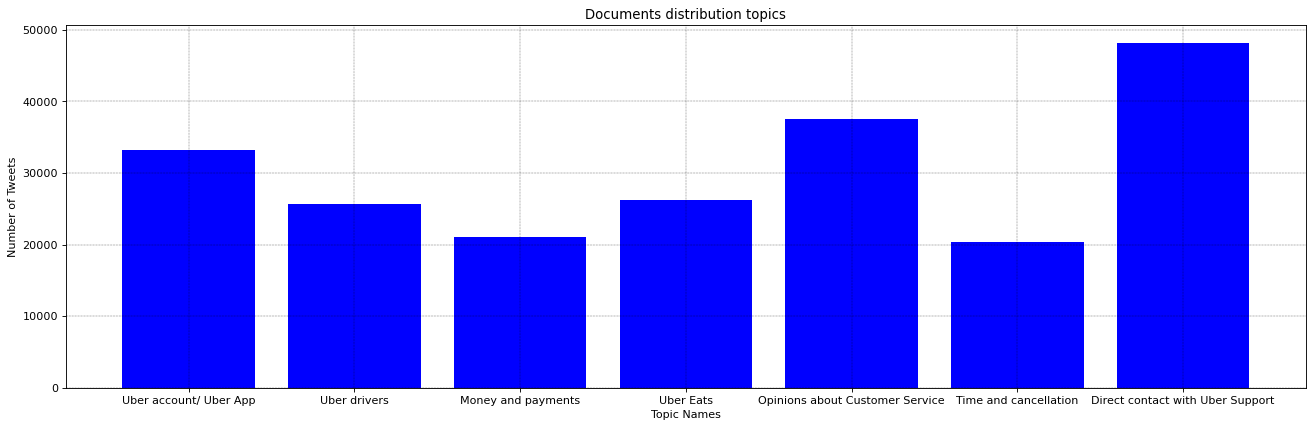

In [27]:
x_values = df_counter['topic_name'].tolist()
y_values = df_counter['Number of tweets'].tolist()

fig = plt.figure()
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel('Topic Names') 
plt.ylabel('Number of Tweets') 
plt.title('Documents distribution topics')
plt.bar(x_values,y_values, color = 'b')
plt.grid(color='black', ls = '-.', lw = 0.25)

plt.savefig('./barChart/LDA6/barchart.png', dpi=400)
plt.show()

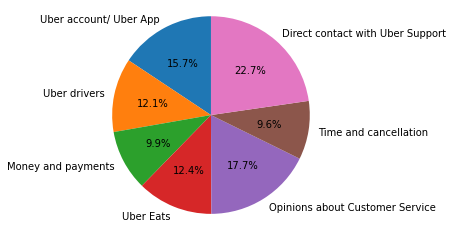

In [28]:
labels = df_counter['topic_name'].tolist()
sizes = df_counter['Number of tweets'].tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.savefig('./barChart/LDA6/pie.jpg', dpi=1000)
plt.show()

### WordClouds 

In [8]:
num_topics = 7
topic_words = []
for i in range(num_topics):
    tt = lda_model.get_topic_terms(i,20)
    topic_words.append([dictionary[pair[0]] for pair in tt])

In [9]:
path = "./wordClouds/LDA6"
try:
    if not os.path.isdir(path):
        os.makedirs(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

Successfully created the directory ./wordClouds/LDA6 


In [12]:
words = " ".join(topic_words[0])

wordcloud = WordCloud(width=780, height=405,
 background_color="white").generate(words)

wordcloud.to_file('wordClouds/LDA6/Topic0.png')

In [13]:
# Topic 0
words = " ".join(topic_words[0])

wordcloud = WordCloud(width=780, height=405,
 background_color="white").generate(words)

wordcloud.to_file('wordClouds/LDA6/Topic0.png')

# Topic 1
words = " ".join(topic_words[1])

wordcloud = WordCloud(width=780, height=405,
 background_color="white").generate(words)

wordcloud.to_file('wordClouds/LDA6/Topic1.png')

# Topic 2
words = " ".join(topic_words[2])

wordcloud = WordCloud(width=780, height=405,
 background_color="white").generate(words)

wordcloud.to_file('wordClouds/LDA6/Topic2.png')

# Topic 3
words = " ".join(topic_words[3])

wordcloud = WordCloud(width=780, height=405,
 background_color="white").generate(words)

wordcloud.to_file('wordClouds/LDA6/Topic3.png')

# Topic 4
words = " ".join(topic_words[4])

wordcloud = WordCloud(width=780, height=405,
 background_color="white").generate(words)

wordcloud.to_file('wordClouds/LDA6/Topic4.png')

# Topic 5
words = " ".join(topic_words[5])

wordcloud = WordCloud(width=780, height=405,
 background_color="white").generate(words)

wordcloud.to_file('wordClouds/LDA6/Topic5.png')

# Topic 6
words = " ".join(topic_words[6])

wordcloud = WordCloud(width=780, height=405,
 background_color="white").generate(words)

wordcloud.to_file('wordClouds/LDA6/Topic6.png')

# Documents with high probability values

In [29]:
df.loc[(df['dominant_topic'] == 0) & (df['maximum_probability']>0.70)][:50]

,dominant_topic,maximum_probability,date,tweet,cleaned_texts,cleaned_texts_1,length,Cluster
24,0,0.759419,2020-03-31 22:29:00,@Uber_Support The email is haydenmechielsen@gm...,"[email, ever, access, account, chang, phone_nu...","[email, ever, access, account, chang, phone_nu...",6,Uber account/Uber App
37,0,0.714013,2020-03-31 22:05:50,@dkhos can u please help @Uber_Support won’t...,"[help, help]","[help, help]",2,Uber account/Uber App
41,0,0.856926,2020-03-31 22:02:26,@dkhos can you help your Uber support @Uber_Su...,"[help, uber, support, help, help]","[help, uber, support, help, help]",5,Uber account/Uber App
43,0,0.827959,2020-03-31 21:58:26,@Uber_Support Why did my promotion expire wh...,"[promot, expir, april, yet]","[promot, expir, april, yet]",4,Uber account/Uber App
56,0,0.740930,2020-03-31 21:08:23,@Uber_Support my Uber account won’t let me upd...,"[uber, account, let, updat, email_address, act...","[uber, account, let, updat, email_address, act...",8,Uber account/Uber App
61,0,0.856978,2020-03-31 20:57:42,@Uber_Support need help with a verification co...,"[need, help, verif_code, email, get]","[need, help, verif_code, email, get]",5,Uber account/Uber App
64,0,0.705935,2020-03-31 20:50:27,@Uber_Support please can you follow me so i ca...,"[follow, lock, nhs, uber, eat, account, help]","[follow, lock, nhs, uber, eat, account, help]",7,Uber account/Uber App
71,0,0.946264,2020-03-31 20:20:14,"@Uber_Support hi guys, trying to use an uber e...","[guy, tri, use, uber, eat, promo_code, email, ...","[guy, tri, use, uber, eat, promo_code, email, ...",15,Uber account/Uber App
76,0,0.732483,2020-03-31 19:59:22,"@Uber_Support hello, I’m a doctor for the NHS ...","[doctor, nhs, recent, updat, ubereat, email, n...","[doctor, nhs, recent, updat, ubereat, email, n...",11,Uber account/Uber App
81,0,0.839925,2020-03-31 19:50:42,@Uber_Support hello! somebody is trying to reg...,"[tri, regist, uber, number, get, verif_code, p...","[tri, regist, uber, number, get, verif_code, p...",12,Uber account/Uber App


In [30]:
df.loc[(df['dominant_topic'] == 1) & (df['maximum_probability']>0.70)][:50]

,dominant_topic,maximum_probability,date,tweet,cleaned_texts,cleaned_texts_1,length,Cluster
17,1,0.741801,2020-03-31 23:01:09,@Uber_Support Is Uber going to provide driver...,"[uber, provid, driver, sanit, wipe, vehicl, in...","[uber, provid, driver, sanit, wipe, vehicl, in...",16,Uber drivers
166,1,0.756617,2020-03-31 16:15:02,@Uber_Support so what happened to all this tal...,"[happen, talk, earli, step, protect, driver, p...","[happen, talk, earli, step, protect, driver, p...",20,Uber drivers
174,1,0.747607,2020-03-31 15:39:04,@Uber - Please update your driver navigation a...,"[updat, driver, navig, app, street, suggest, d...","[updat, driver, navig, app, street, suggest, d...",12,Uber drivers
175,1,0.713987,2020-03-31 15:32:25,@Harr1sonScott @ShieldVoC @Uber @Uber_Support ...,"[great, decis]","[great, decis]",2,Uber drivers
201,1,0.815251,2020-03-31 14:44:51,@_madelinetorres @timotheetee @ShieldVoC @Uber...,"[hear, seem, uber, overwhelm, mani, new, drive...","[hear, seem, uber, overwhelm, mani, new, drive...",25,Uber drivers
227,1,0.738584,2020-03-31 13:31:06,@Uber @Uber_Support they offered their drivers...,"[offer, driver, financi_assist, take, road, gi...","[offer, driver, financi_assist, take, road, gi...",19,Uber drivers
359,1,0.857011,2020-03-31 02:52:02,Hey @Uber @UberFacts @UberSoc @Uber_Support do...,"[driver, nyc, jersey, wear_mask, glove]","[driver, nyc, jersey, wear_mask, glove]",5,Uber drivers
371,1,0.785377,2020-03-31 02:04:04,@mariroars @Uber_Support Uber is essential acc...,"[uber, essenti, accord]","[uber, essenti, accord]",3,Uber drivers
373,1,0.954793,2020-03-31 01:56:54,@AtlGary80 @jackanorycabbie @Uber @Uber_Suppor...,"[explain, use, form, transport, happen, social...","[explain, use, form, transport, happen, social...",18,Uber drivers
388,1,0.798623,2020-03-31 00:41:47,"Go drive for Lyft, they support their drivers ...","[drive, lyft, support, driver, uber, promis, p...","[drive, lyft, support, driver, uber, promis, p...",19,Uber drivers


In [31]:
df.loc[(df['dominant_topic'] == 2) & (df['maximum_probability']>0.70)][:50]

,dominant_topic,maximum_probability,date,tweet,cleaned_texts,cleaned_texts_1,length,Cluster
163,2,0.785242,2020-03-31 16:25:23,UBER DOESN'T PAY THEIR DRIVERS @FOX4 @realDona...,"[uber, pay, driver]","[uber, pay, driver]",3,Money and payments
273,2,0.714086,2020-03-31 11:12:59,@gildingstudio @Uber_Support I totally agree!!,"[total, agre]","[total, agre]",2,Money and payments
280,2,0.949346,2020-03-31 10:34:07,@hydcitypolice @Uber_India @cyberabadpolice @A...,"[top, prioriti, follow, sir, uber, cancel, tre...","[top, prioriti, follow, sir, uber, cancel, tre...",16,Money and payments
312,2,0.946146,2020-03-31 07:27:23,@Uber_Support - Having initiated an UBER PASS ...,"[initi, uber, pass, januari, year, featur, tur...","[initi, uber, pass, januari, year, featur, tur...",15,Money and payments
517,2,0.710437,2020-03-30 18:19:25,@Uber_Support will you all be enforcing the cu...,"[enforc, curfew, maryland, effect, tonight, ri...","[enforc, curfew, maryland, effect, tonight, ri...",8,Money and payments
848,2,0.901068,2020-03-29 13:20:11,@Uber_Support @Uber On 18th march I have booke...,"[march, book_cab, ghaziabad, railway_station, ...","[march, book_cab, ghaziabad, railway_station, ...",18,Money and payments
993,2,0.785352,2020-03-28 22:48:00,@TheRideshareGuy @Uber_Support @AskLyft Dear H...,"[dear, see, imag]","[dear, see, imag]",3,Money and payments
1727,2,0.714002,2020-03-26 19:17:30,@evanjpg I’ve had these today and yesterday to...,"[today, yesterday]","[today, yesterday]",2,Money and payments
1805,2,0.713584,2020-03-26 15:34:47,But @ola_supports @Uber_Support cabs are runni...,"[cab, run]","[cab, run]",2,Money and payments
1824,2,0.713100,2020-03-26 14:54:23,@c0psandroberts @Uber_Support @Uber We’re you ...,"[abl, cash]","[abl, cash]",2,Money and payments


In [32]:
df.loc[(df['dominant_topic'] == 3) & (df['maximum_probability']>0.70)][:50]

,dominant_topic,maximum_probability,date,tweet,cleaned_texts,cleaned_texts_1,length,Cluster
13,3,0.815864,2020-03-31 23:11:02,@Uber_Support hello ordered 70$ worth of east ...,"[order, worth, east, side, come, cold, chicken...","[order, worth, east, side, come, cold, chicken...",28,Uber Eats
19,3,0.856592,2020-03-31 22:56:21,Can you help with an uber eats order issue @Ub...,"[help, uber, eat, order, issu]","[help, uber, eat, order, issu]",5,Uber Eats
27,3,0.790862,2020-03-31 22:22:34,"@Uber_Support I ordered, the restaurant screwe...","[order, restaur, screw, order, talk, get, item...","[order, restaur, screw, order, talk, get, item...",11,Uber Eats
57,3,0.946245,2020-03-31 21:06:21,@MasonxxxP @ShieldVoC @McDonalds @UberEats @Ub...,"[happi, mcdonald, dream, abt, restaur, close, ...","[happi, mcdonald, dream, abt, restaur, close, ...",15,Uber Eats
89,3,0.785533,2020-03-31 19:33:13,@Uber_Support my food never arrived 🤷🏻‍♂️😭😭💔,"[food, never, arriv]","[food, never, arriv]",3,Uber Eats
153,3,0.779838,2020-03-31 16:53:17,@Uber_Support hi i have just made an order and...,"[make, order, order, complet, wrong, tell, del...","[make, order, order, complet, wrong, tell, del...",12,Uber Eats
169,3,0.877206,2020-03-31 16:08:21,@Uber_Support hey @Uber_Support im@trying to p...,"[place, uber, eat, order, keep, get]","[place, uber, eat, order, keep, get]",6,Uber Eats
182,3,0.825471,2020-03-31 15:16:40,"@uber_support as a blind #voiceover user, plea...","[blind, voiceov, user, let_know, order, coke, ...","[blind, voiceov, user, let_know, order, coke, ...",13,Uber Eats
209,3,0.798646,2020-03-31 14:27:36,@Uber_Support The support site for Uber Eats d...,"[support, site, uber, eat, work, tri, get, hel...","[support, site, uber, eat, work, tri, get, hel...",17,Uber Eats
250,3,0.860709,2020-03-31 12:23:53,@pslbill @Uber_Support Nothing to do with a de...,"[deliveri, fee, servic, charg, tip, right, add...","[deliveri, fee, servic, charg, tip, right, add...",14,Uber Eats


In [33]:
df.loc[(df['dominant_topic'] == 4) & (df['maximum_probability']>0.70)][:50]

,dominant_topic,maximum_probability,date,tweet,cleaned_texts,cleaned_texts_1,length,Cluster
45,4,0.892332,2020-03-31 21:52:52,@Uber_Support Pls hurry I am down to my last d...,"[hurri, last, dime, shower, neighbor, report, ...","[hurri, last, dime, shower, neighbor, report, ...",7,Opinions about Customer Service
47,4,0.828143,2020-03-31 21:46:21,.@Uber_Support still looking for a callback #w...,"[still, look, callback, worstcustomerservic]","[still, look, callback, worstcustomerservic]",4,Opinions about Customer Service
60,4,0.785419,2020-03-31 21:01:58,@Uber_Support worst support in the world goes ...,"[bad, support, world]","[bad, support, world]",3,Opinions about Customer Service
83,4,0.785111,2020-03-31 19:44:57,@Uber_Support I've replied back. 6 x $0.99 to...,"[repli, back, refund]","[repli, back, refund]",3,Opinions about Customer Service
101,4,0.904371,2020-03-31 19:04:23,@Uber_Support Ill be reaching out in the near ...,"[ill, reach, futur, disgust, even, talk, peopl...","[ill, reach, futur, disgust, even, talk, peopl...",8,Opinions about Customer Service
105,4,0.714052,2020-03-31 18:45:14,@Uber_Support Is there anyone at customer serv...,"[custom_servic, answer]","[custom_servic, answer]",2,Opinions about Customer Service
112,4,0.705765,2020-03-31 18:19:16,@scams_uber @steve_garelick @jockneycab @Uber_...,"[leech, parasit, world, surpris, make, fact, d...","[leech, parasit, world, surpris, make, fact, d...",8,Opinions about Customer Service
123,4,0.785199,2020-03-31 18:00:39,@Uber_Support I replied and never got a response,"[never, get, respons]","[never, get, respons]",3,Opinions about Customer Service
130,4,0.729596,2020-03-31 17:50:22,@Uber_Support I'm goog now. But you guys shou...,"[guy, realli, add, autom, chat, respons, set, ...","[guy, realli, add, autom, chat, respons, set, ...",10,Opinions about Customer Service
179,4,0.785418,2020-03-31 15:25:38,@Uber_Support Seriously? After 1 week? This is...,"[serious, week, disappoint]","[serious, week, disappoint]",3,Opinions about Customer Service


In [34]:
df.loc[(df['dominant_topic'] == 5) & (df['maximum_probability']>0.70)][:50]

,dominant_topic,maximum_probability,date,tweet,cleaned_texts,cleaned_texts_1,length,Cluster
33,5,0.784955,2020-03-31 22:14:47,Can you tell me you deny my claim ? @Uber_Support,"[tell, deni, claim]","[tell, deni, claim]",3,Time and cancellation
339,5,0.785161,2020-03-31 04:40:46,@Beto4US That’s not cool. Take note @UberEats ...,"[cool, take, note]","[cool, take, note]",3,Time and cancellation
343,5,0.722754,2020-03-31 04:18:04,my @UberEats driver just came all the way to m...,"[driver, come, way, hous, spend, lot, time, fr...","[driver, come, way, hous, spend, lot, time, fr...",15,Time and cancellation
370,5,0.716841,2020-03-31 02:04:08,@Uber_Support y’all have to rethink the two st...,"[rethink, stop, ride, forev, come, first, stop...","[rethink, stop, ride, forev, come, first, stop...",9,Time and cancellation
497,5,0.706417,2020-03-30 19:20:22,@AtlGary80 @ShieldVoC @Uber @Uber_Support @lyf...,"[alway, ensur, trip, end, right, experi, drive...","[alway, ensur, trip, end, right, experi, drive...",8,Time and cancellation
587,5,0.785128,2020-03-30 13:38:59,@Uber_Support I’ve called multiple times just ...,"[call, multipl_time, tell]","[call, multipl_time, tell]",3,Time and cancellation
760,5,0.827214,2020-03-29 20:00:59,@Uber_Support How can i get my tax forms ive ...,"[get, tax_form, wait, show]","[get, tax_form, wait, show]",4,Time and cancellation
874,5,0.785458,2020-03-29 10:51:46,why tf y’all connecting me to drivers that’s 1...,"[connect, driver, minut_away]","[connect, driver, minut_away]",3,Time and cancellation
963,5,0.877431,2020-03-29 00:44:45,@freeblackgirl @Uber_Support I've called 833-2...,"[call, past, wait, time, bit, long]","[call, past, wait, time, bit, long]",6,Time and cancellation
1007,5,0.856629,2020-03-28 22:11:32,@LusionStylez @Uber_Support We have all been a...,"[ask, stay_home, know, compens, driver]","[ask, stay_home, know, compens, driver]",5,Time and cancellation


In [35]:
df.loc[(df['dominant_topic'] == 6) & (df['maximum_probability']>0.70)][:50]

,dominant_topic,maximum_probability,date,tweet,cleaned_texts,cleaned_texts_1,length,Cluster
4,6,0.721078,2020-03-31 23:46:27,"@Uber_Support Hey, I'm receiving ride reports ...","[receiv, ride, report, email, even, account, guy]","[receiv, ride, report, email, even, account, guy]",7,Direct contact with Uber Support
10,6,0.856977,2020-03-31 23:21:19,@Uber_Support Read my original tweet and answe...,"[read, origin, tweet, answer_question, account]","[read, origin, tweet, answer_question, account]",5,Direct contact with Uber Support
22,6,0.713625,2020-03-31 22:31:58,@Uber_Support @uber why is no one checking my ...,"[check, import]","[check, import]",2,Direct contact with Uber Support
38,6,0.785460,2020-03-31 22:03:36,@Uber_Support still looking for answers here.,"[still, look, answer]","[still, look, answer]",3,Direct contact with Uber Support
54,6,0.713982,2020-03-31 21:10:58,@Uber_Support I didn’t hear from you yet for a...,"[hear, yet]","[hear, yet]",2,Direct contact with Uber Support
55,6,0.713498,2020-03-31 21:10:26,@Uber_Support I still didn’t get it from you,"[still, get]","[still, get]",2,Direct contact with Uber Support
72,6,0.876963,2020-03-31 20:18:01,@Uber_Support Thanks. It was usual email state...,"[thank, usual, email, state, get, paper]","[thank, usual, email, state, get, paper]",6,Direct contact with Uber Support
80,6,0.754731,2020-03-31 19:54:20,@Uber_Support it’s been about a week since I a...,"[week, appli, check, help, realli, work, need,...","[week, appli, check, help, realli, work, need,...",14,Direct contact with Uber Support
82,6,0.713347,2020-03-31 19:46:27,@Uber_Support Can you go 6 days without work??,"[day, work]","[day, work]",2,Direct contact with Uber Support
90,6,0.711069,2020-03-31 19:30:01,@Uber_Support It’s now been 6 days that I have...,"[day, abl, work, approv, insur, messag, tell]","[day, abl, work, approv, insur, messag, tell]",7,Direct contact with Uber Support
